In [5]:
import pandas

def read_data(file_name):
    csv_file = pandas.read_csv(f'../data/{file_name}.csv')
    print('Head')
    print(csv_file.head())
    print()
    print('Statistics')
    print(csv_file.describe())
    return csv_file

In [6]:
import matplotlib.pyplot as plt

def show_hist(data, column_name, bins=30):
    plt.title(column_name)
    plt.hist(data[column_name], bins=bins)

def show_bar(data, column_name):
    plt.title(column_name)
    data[column_name].value_counts().plot(kind="bar")

# Data Model
![title](images/data_model.png)

\pagebreak
## Student registrations
* code_module – an identification code for a module.
* code_presentation - the identification code of the presentation.
* id_student – a unique identification number for the student.
* date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

In [7]:
studentRegistration = read_data("studentRegistration")

Head
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  

Statistics
         id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e

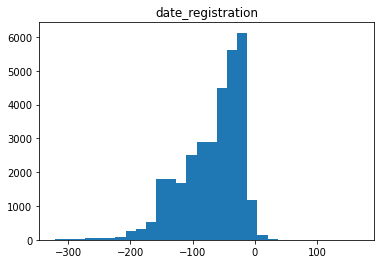

In [8]:
show_hist(studentRegistration, "date_registration")

\pagebreak
## Assessments

* code_module – identification code of the module, to which the assessment belongs.
* code_presentation - identification code of the presentation, to which the assessment belongs.
* id_assessment – identification number of the assessment.
* assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
* date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
* weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.


In [9]:
assessments = read_data("assessments")


Head
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0

Statistics
       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000


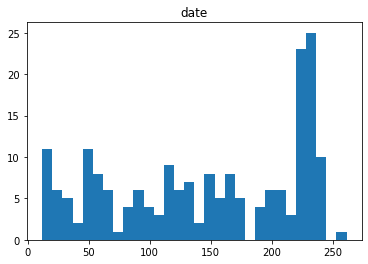

In [10]:
show_hist(assessments, "date")

\pagebreak
## Courses

* code_module – code name of the module, which serves as the identifier.
* code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* length - length of the module-presentation in days.

In [11]:
courses = read_data("courses")

Head
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240

Statistics
       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000


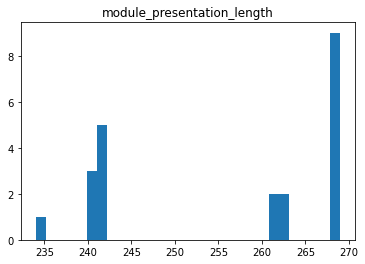

In [12]:
show_hist(courses, "module_presentation_length")

\pagebreak
## Virtual learning environments

* id_site – an identification number of the material.
* code_module – an identification code for module.
* code_presentation - the identification code of presentation.
* activity_type – the role associated with the module material.
* week_from – the week from which the material is planned to be used.
* week_to – week until which the material is planned to be used.

In [13]:
vles = read_data("vle")

Head
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN

Statistics
            id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.300965e+05    15.000000    15.000000
75%    8.140162e+05    22.000000    22.000000
max    1.077905e+06    29.000000    29.000000


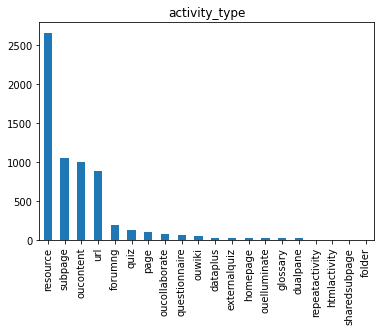

In [14]:
show_bar(vles, "activity_type")

\pagebreak
## Student virtual learning environments
* code_module – an identification code for a module.
* code_presentation - the identification code of the module presentation.
* id_student – a unique identification number for the student.
* id_site - an identification number for the VLE material.
* date – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* sum_click – the number of times a student interacts with the material in that day.

In [15]:
studentVles = read_data("studentVle")

Head
  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1

Statistics
         id_student       id_site          date     sum_click
count  1.065528e+07  1.065528e+07  1.065528e+07  1.065528e+07
mean   7.333336e+05  7.383234e+05  9.517400e+01  3.716946e+00
std    5.827060e+05  1.312196e+05  7.607130e+01  8.849047e+00
min    6.516000e+03  5.267210e+05 -2.500000e+01  1.000000e+00
25%    5.077430e+05  6.735190e+05  2.500000e+01  1.000000e+00
50%    5.882360e+05  7.300690e+05  8.600000e+01  2.000000e+00
75%    6.464840e+05  8.770300e+05  1.560000e+02  3.000000e+00
max    2.698588e+06  1.049562e+06  2.690000e+02  6.977000e+03


\pagebreak
## Student information

* code_module – an identification code for a module on which the student is registered.
* code_presentation - the identification code of the presentation during which the student is registered on the module.
* id_student – a unique identification number for the student.
* gender – the student’s gender.
* region – identifies the geographic region, where the student lived while taking the module-presentation.
* highest_education – highest student education level on entry to the module presentation.
* imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* age_band – band of the student’s age.
* num_of_prev_attempts – the number times the student has attempted this module.
* studied_credits – the total number of credits for the modules the student is currently studying.
* disability – indicates whether the student has declared a disability.
* final_result – student’s final result in the module-presentation.

In [16]:
studentInfo = read_data("studentInfo")

Head
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         P

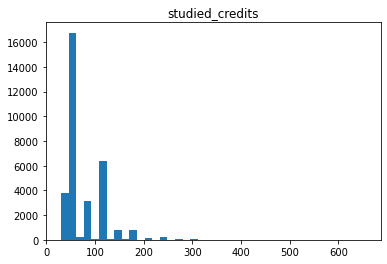

In [17]:
show_hist(studentInfo, "studied_credits", bins=40)

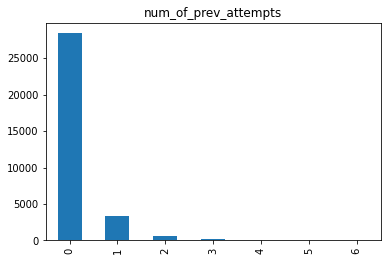

In [18]:
show_bar(studentInfo, "num_of_prev_attempts")

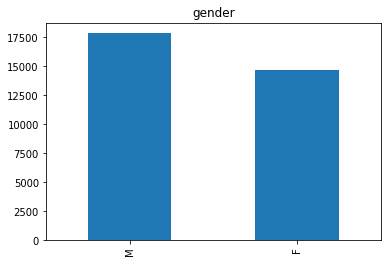

In [19]:
show_bar(studentInfo, "gender")

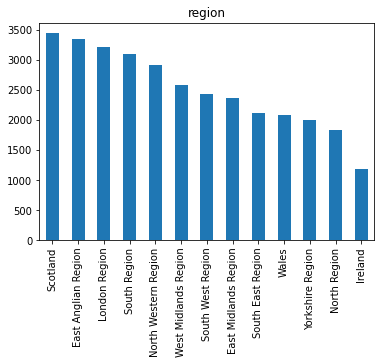

In [20]:
show_bar(studentInfo, "region")

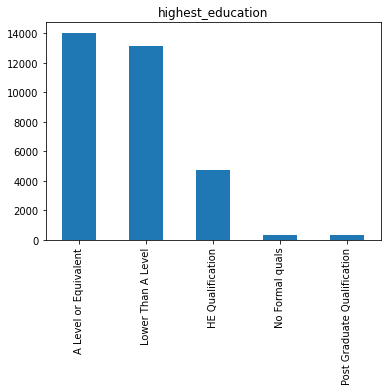

In [21]:
show_bar(studentInfo, "highest_education")

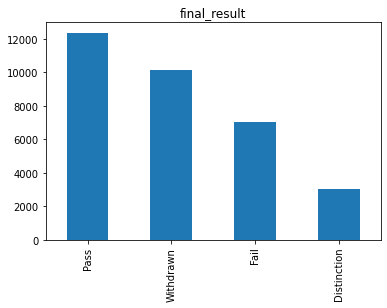

In [22]:
show_bar(studentInfo, "final_result")

\pagebreak
## Student assessments

* id_assessment – the identification number of the assessment.
* id_student – a unique identification number for the student.
* date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.
* is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.
* score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.


In [23]:
studentAssessments = read_data("studentAssessment")

Head
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0

Statistics
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000   

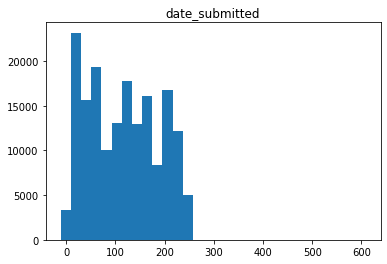

In [24]:
show_hist(studentAssessments, "date_submitted")

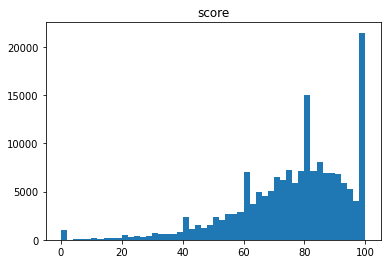

In [25]:
show_hist(studentAssessments, "score", bins=50)